In [92]:
import folium
import folium.plugins

from matplotlib import pyplot as plt
import pandas as pd
import xml.etree.ElementTree as ET

net_xml = "seattle.net.xml"
add_xml = "seattle.add.xml"

#### Transaction investigation

In [93]:
park_transaction = pd.read_csv("seattle_transactions.csv")

In [94]:
park_transaction['Transaction DateTime'] = pd.to_datetime(park_transaction['Transaction DateTime'])

#### temporal distribution

In [95]:
boundary = [(47.612799, 47.618586), (-122.352507,-122.343548)]

# define by block names and by bounding box
study_area_trans = park_transaction[
    (park_transaction['Blockface Name'].str.contains('1|2|3|4')) & \
    (park_transaction['Blockface Name'].str.contains('CEDAR|VINE|WALL|BATTERY')) &\
    (park_transaction['Latitude'].between(boundary[0][0], boundary[0][1], inclusive=True)) & \
    (park_transaction['Longitude'].between(boundary[1][0], boundary[1][1], inclusive=True)) & \
    (park_transaction['Blockface Name'].str.contains('5|6|ALASKAN|WESTERN|ELLIOT|CLAY|BELL|DENNY') == False)
]

##### Seattle 10/28 - 11/03 (a week)

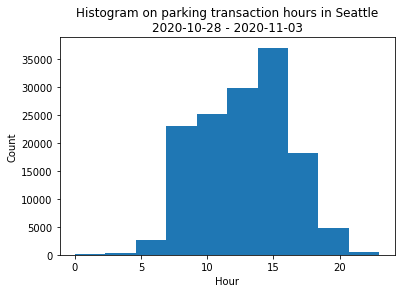

In [96]:
fig, ax = plt.subplots()

park_transaction['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Seattle\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

##### Demo area 10/28 - 11/03 (a week)

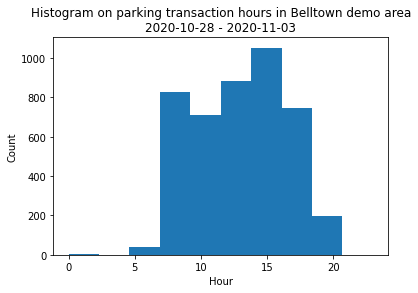

In [97]:
fig, ax = plt.subplots()

study_area_trans['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Belltown demo area\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

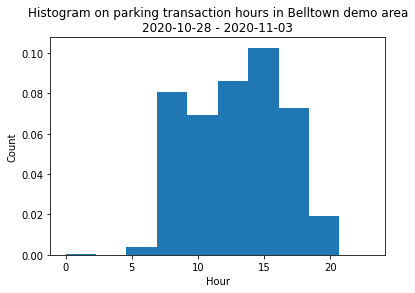

In [98]:
fig, ax = plt.subplots()

study_area_trans['Transaction DateTime'].dt.hour.hist(ax=ax, grid=False, density=1)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax.set_title('Histogram on parking transaction hours in Belltown demo area\n{} - {}'.format(
    study_area_trans['Transaction DateTime'].dt.date.min(), study_area_trans['Transaction DateTime'].dt.date.max()))

plt.show()

#### spatial distribution

In [99]:
study_area_trans

,Transaction ID,Meter Code,Transaction DateTime,Payment Mean,Amount Paid,Duration In Minutes,Blockface Name,Side Of Street,Element key,Parking Space Number,Latitude,Longitude
164,901839288,10282004,2020-10-28 07:50:00,CREDIT CARD,0.50,60,VINE ST BETWEEN 1ST AVE AND 2ND AVE,NW,58617,NaN,47.615651,-122.349293
170,901839349,10209004,2020-10-28 07:51:00,CREDIT CARD,2.00,240,2ND AVE BETWEEN WALL ST AND VINE ST,SW,2781,NaN,47.615585,-122.348439
253,901844416,10207004,2020-10-28 08:06:00,PHONE,0.25,30,2ND AVE BETWEEN WALL ST AND VINE ST,NE,2782,NaN,47.615696,-122.348301
261,901844484,10299004,2020-10-28 08:06:00,PHONE,0.62,75,CEDAR ST BETWEEN 2ND AVE AND 3RD AVE,SE,54954,NaN,47.616735,-122.349248
290,901844709,10290004,2020-10-28 08:07:00,PHONE,2.00,240,VINE ST BETWEEN 3RD AVE AND 4TH AVE,SE,81290,NaN,47.616859,-122.347440
...,...,...,...,...,...,...,...,...,...,...,...,...
141656,904026887,10210004,2020-11-03 19:38:00,PHONE,0.17,20,2ND AVE BETWEEN VINE ST AND CEDAR ST,NE,25718,NaN,47.616245,-122.349211
141667,904027072,10506004,2020-11-03 19:40:00,PHONE,0.17,20,WALL ST BETWEEN 1ST AVE AND 2ND AVE,SE,13346,NaN,47.615003,-122.348237
141676,904027327,10268004,2020-11-03 19:43:00,PHONE,0.14,17,BATTERY ST BETWEEN 2ND AVE AND 3RD AVE,SE,76986,NaN,47.615079,-122.346443
141702,904028217,10122004,2020-11-03 19:51:00,PHONE,0.08,9,1ST AVE BETWEEN WALL ST AND VINE ST,SW,24045,NaN,47.614928,-122.349306


In [100]:
belltown = folium.Map([sum(boundary[0])/2, sum(boundary[1])/2], zoom_start=16, tiles='CartoDB positron')

belltown.add_child(folium.plugins.HeatMap(study_area_trans[['Latitude', 'Longitude']], radius=20, blur=35))

belltown

## Transaction Pattern

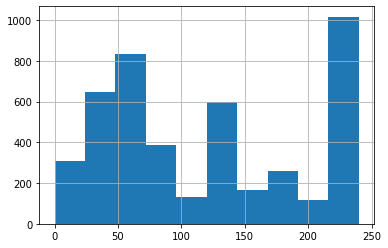

In [119]:
study_area_trans['Duration In Minutes'].hist()

In [120]:
study_area_trans['Transaction DateTime'].dt.hour < 12

164        True
170        True
253        True
261        True
290        True
          ...  
141656    False
141667    False
141676    False
141702    False
141705    False
Name: Transaction DateTime, Length: 4462, dtype: bool

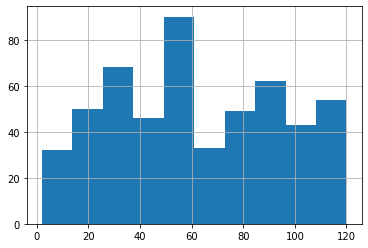

In [121]:
time = 18
delta_time = 3
study_area_trans[(study_area_trans['Transaction DateTime'].dt.hour >= time) & (study_area_trans['Transaction DateTime'].dt.hour < time + delta_time)]['Duration In Minutes'].hist()

In [122]:
# select weekday data
study_area_trans = study_area_trans[study_area_trans['Transaction DateTime'].dt.weekday <= 5]

In [123]:
study_area_trans['Transaction Hour'] = study_area_trans['Transaction DateTime'].dt.hour

In [124]:
study_area_trans['Duration Category'] = study_area_trans['Duration In Minutes']
study_area_trans.loc[study_area_trans['Duration In Minutes'] <= 10, 'Duration Category'] = 10
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 10) & (study_area_trans['Duration In Minutes'] <= 20), 'Duration Category'] = 20
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 20) & (study_area_trans['Duration In Minutes'] <= 30), 'Duration Category'] = 30
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 30) & (study_area_trans['Duration In Minutes'] <= 60), 'Duration Category'] = 60
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 60) & (study_area_trans['Duration In Minutes'] <= 90), 'Duration Category'] = 90
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 90) & (study_area_trans['Duration In Minutes'] <= 120), 'Duration Category'] = 120
study_area_trans.loc[(study_area_trans['Duration In Minutes'] > 120) & (study_area_trans['Duration In Minutes'] <= 240), 'Duration Category'] = 240

In [125]:
parking_tempo_dist = study_area_trans.groupby(['Duration Category', 'Transaction Hour']).size().unstack('Transaction Hour', fill_value=0)
parking_tempo_dist

Transaction Hour,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23
Duration Category,,,,,,,,,,,,,,,,,
10,0,0,0,0,2,6,7,13,11,7,12,10,12,17,16,11,0
20,0,0,0,0,4,7,13,8,20,21,19,11,15,19,11,23,0
30,0,0,0,7,28,38,43,47,60,49,58,48,46,33,19,45,0
60,0,0,1,14,52,71,52,87,90,107,77,72,69,65,43,118,0
90,0,0,1,5,22,23,38,37,40,36,22,22,25,26,121,0,0
120,0,0,1,19,44,40,38,47,54,53,26,53,70,96,120,0,0
240,2,9,26,61,215,169,134,147,211,126,110,112,164,162,0,0,1


In [126]:
# Average daily parking transcation
parking_tempo_dist = (parking_tempo_dist/5).round(0).astype(int)
parking_tempo_dist

Transaction Hour,0,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23
Duration Category,,,,,,,,,,,,,,,,,
10,0,0,0,0,0,1,1,3,2,1,2,2,2,3,3,2,0
20,0,0,0,0,1,1,3,2,4,4,4,2,3,4,2,5,0
30,0,0,0,1,6,8,9,9,12,10,12,10,9,7,4,9,0
60,0,0,0,3,10,14,10,17,18,21,15,14,14,13,9,24,0
90,0,0,0,1,4,5,8,7,8,7,4,4,5,5,24,0,0
120,0,0,0,4,9,8,8,9,11,11,5,11,14,19,24,0,0
240,0,2,5,12,43,34,27,29,42,25,22,22,33,32,0,0,0


In [127]:
parking_tempo_dist = parking_tempo_dist.reset_index().rename_axis(None, axis=1)
parking_tempo_dist = parking_tempo_dist.drop([0, 23], axis=1)
parking_tempo_dist

,Duration Category,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,10,0,0,0,0,1,1,3,2,1,2,2,2,3,3,2
1,20,0,0,0,1,1,3,2,4,4,4,2,3,4,2,5
2,30,0,0,1,6,8,9,9,12,10,12,10,9,7,4,9
3,60,0,0,3,10,14,10,17,18,21,15,14,14,13,9,24
4,90,0,0,1,4,5,8,7,8,7,4,4,5,5,24,0
5,120,0,0,4,9,8,8,9,11,11,5,11,14,19,24,0
6,240,2,5,12,43,34,27,29,42,25,22,22,33,32,0,0


In [128]:
parking_tempo_dist.to_csv('parking_demand_dist.csv', index=False)